In [1]:
import pandas as pd
import seaborn as sns

In [2]:
input_dir = '/Users/bryanmichalek/Documents/GitHub_Personal/sports_betting_data/05-evaluation'

In [3]:
baseline_bets = pd.read_csv(f'{input_dir}/baseline/test/baseline_bet_list.csv')
nhlnet_bets = pd.read_csv(f'{input_dir}/NHLnet/test/NHLnet_bet_list.csv')

In [4]:
baseline_bets['model'] = 'baseline'
nhlnet_bets['model'] = 'nhlnet'
combined = pd.concat([baseline_bets, nhlnet_bets], axis=0)
combined

,player_id,date,odds,pred_G,G,prob,EV,win_flag,place_bet_flag,profit,model
0,acciano01,2023-10-13,550,0.133300,0.0,0.008133,-0.947135,0,0,0.0,baseline
1,acciano01,2023-10-14,550,0.133300,0.0,0.008133,-0.947135,0,0,0.0,baseline
2,acciano01,2023-10-18,550,0.133300,0.0,0.008133,-0.947135,0,0,0.0,baseline
3,acciano01,2023-10-21,500,0.133300,0.0,0.008133,-0.951202,0,0,0.0,baseline
4,acciano01,2023-10-24,600,0.133300,0.0,0.008133,-0.943069,0,0,0.0,baseline
...,...,...,...,...,...,...,...,...,...,...,...
4816,zuckeja01,2023-12-27,285,0.237469,1.0,0.024105,-0.907194,1,0,0.0,nhlnet
4817,zuckeja01,2023-12-29,250,0.248330,0.0,0.026175,-0.908389,0,0,0.0,nhlnet
4818,zuckeja01,2024-01-02,300,0.231263,0.0,0.022955,-0.908180,0,0,0.0,nhlnet
4819,zuckeja01,2024-01-13,290,0.207006,0.0,0.018686,-0.927123,0,0,0.0,nhlnet


<Axes: xlabel='prob', ylabel='Count'>

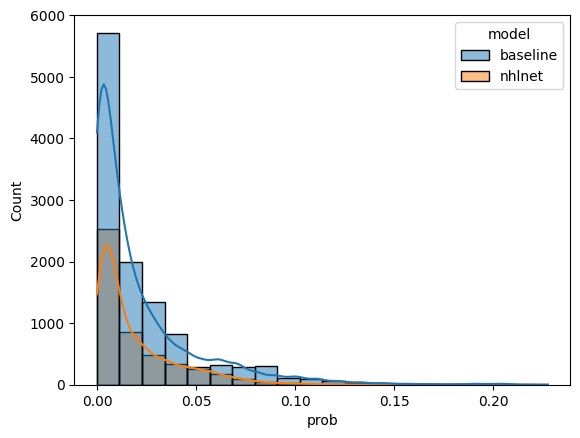

In [5]:
sns.histplot(data=combined, x='prob', hue='model', kde=True, bins=20, common_norm=True)

<Axes: xlabel='prob', ylabel='Density'>

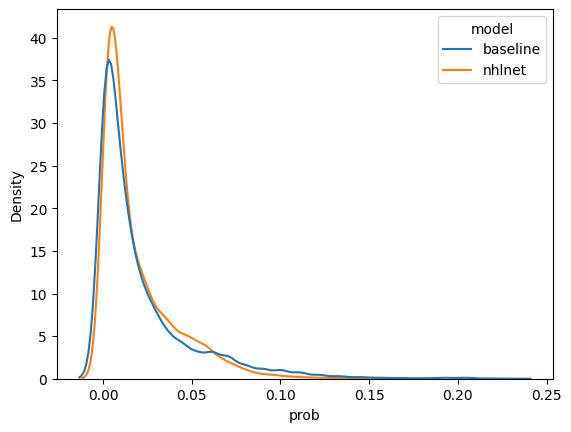

In [9]:
sns.kdeplot(data=combined, x='prob', hue='model', common_norm=False)